In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/chess-transfers/transfers.csv"
df = pd.read_csv(url)

In [2]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                                                 url        ID Federation  \
0  https://ratings.fide.com/fedchange.phtml?year=...   2019221        USA   
1  https://ratings.fide.com/fedchange.phtml?year=...  14401754        BIH   
2  https://ratings.fide.com/fedchange.phtml?year=...  14401762        BIH   
3  https://ratings.fide.com/fedchange.phtml?year=...   2019221        USA   
4  https://ratings.fide.com/fedchange.phtml?year=...  14401754        BIH   

  Form.Fed Transfer Date  
0      PHI      12/15/00  
1      CRO       1/31/00  
2      YUG       1/31/00  
3      PHI      12/15/00  
4      CRO       1/31/00  


In [3]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            932 non-null    object
 1   ID             932 non-null    int64 
 2   Federation     932 non-null    object
 3   Form.Fed       923 non-null    object
 4   Transfer Date  932 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.5+ KB
None


In [4]:
# Display the count of unique values for categorical columns
print("\nCount of unique values for categorical columns:")
categorical_columns = ["Federation", "Form.Fed"]
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Count of unique values for categorical columns:
Federation: 105 unique values
Form.Fed: 100 unique values


In [5]:
print("\nTop 10 most common new federations (Federation):")
print(
    df["Federation"]
    .value_counts()
    .head(10)
    .rename_axis("Federation")
    .reset_index(name="count")
)


Top 10 most common new federations (Federation):
  Federation  count
0        USA     89
1        GER     55
2        CAN     44
3        ESP     41
4        RUS     36
5        FRA     34
6        BIH     32
7        CRO     32
8        TUR     31
9        AUT     29


In [6]:
print("\nTop 10 most common original federations (Form.Fed):")
print(
    df["Form.Fed"]
    .value_counts()
    .head(10)
    .rename_axis("Form.Fed")
    .reset_index(name="count")
)


Top 10 most common original federations (Form.Fed):
  Form.Fed  count
0      RUS     75
1      UKR     60
2      FRA     43
3      GER     42
4      ENG     36
5      USA     33
6      SRB     33
7      ESP     27
8      CUB     24
9      ROU     23


In [7]:
df["Transfer Date"] = pd.to_datetime(
    df["Transfer Date"], format="%m/%d/%y", errors="coerce"
)
print("\nEarliest and latest transfer dates:")
print(f"Earliest: {df['Transfer Date'].min()}")
print(f"Latest: {df['Transfer Date'].max()}")


Earliest and latest transfer dates:
Earliest: 2000-01-31 00:00:00
Latest: 2017-04-11 00:00:00


In [8]:
transfers_per_year = df["Transfer Date"].dt.year.value_counts().sort_index()
print("\nNumber of transfers per year:")
print(transfers_per_year.to_frame("Number of Transfers").rename_axis("Year"))


Number of transfers per year:
      Number of Transfers
Year                     
2000                    6
2001                   38
2002                   62
2003                   56
2004                   40
2005                   50
2006                   41
2007                   60
2008                   46
2009                   57
2010                   50
2011                   56
2012                   53
2013                   57
2014                   82
2015                   84
2016                   48
2017                   46


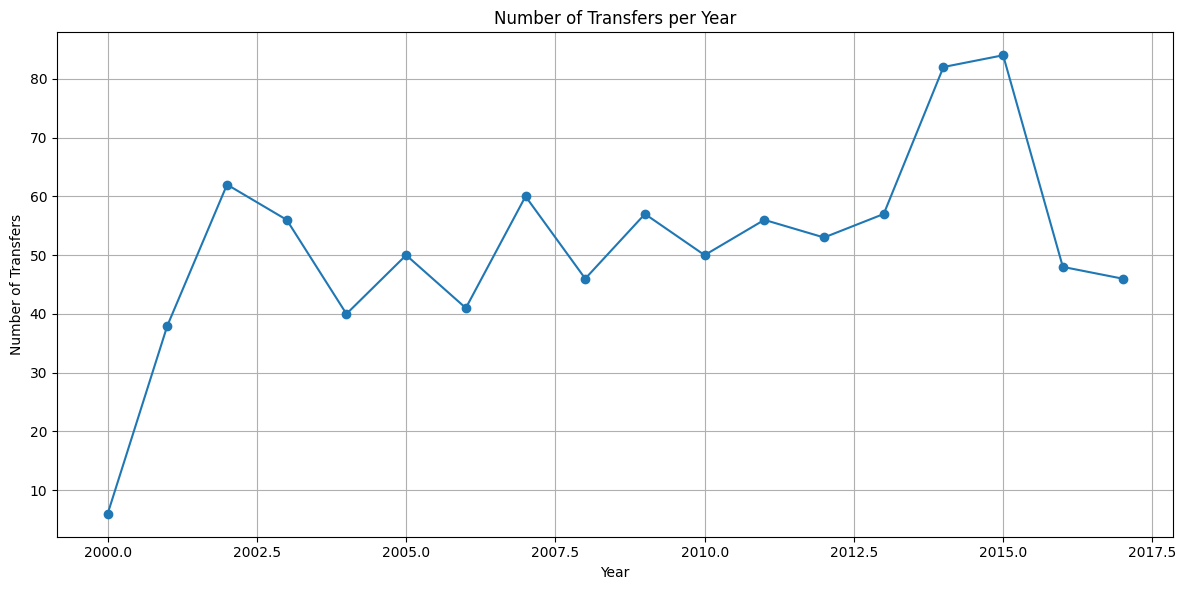

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(transfers_per_year.index, transfers_per_year.values, marker="o")
plt.title("Number of Transfers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Transfers")
plt.grid(True)
plt.tight_layout()
plt.show()